In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mushroom/agaricus-lepiota.data')

In [ ]:
original_column_names=df.columns
print(len(original_column_names))

23


In [ ]:
column_names=['poisonous','cap-shape','cap-surface','cap-color',
              'bruises','odor','gill-attachment','gill-spacing',
              'gill-size','gill-color','stalk-shape','stalk-root',
              'stalk-surface-above-ring','stalk-surface-below-ring',
              'stalk-color-above-ring','stalk-color-below-ring',
              'veil-type','veil-color','ring-number','ring-type',
              'spore-print-color','population','habitat']
print(len(column_names))

23


In [ ]:
column_dict={}
for i in range(23):
  column_dict[original_column_names[i]]=column_names[i]
for key in column_dict:
  print(key,"\t:\t",column_dict[key])

p 	:	 poisonous
x 	:	 cap-shape
s 	:	 cap-surface
n 	:	 cap-color
t 	:	 bruises
p.1 	:	 odor
f 	:	 gill-attachment
c 	:	 gill-spacing
n.1 	:	 gill-size
k 	:	 gill-color
e 	:	 stalk-shape
e.1 	:	 stalk-root
s.1 	:	 stalk-surface-above-ring
s.2 	:	 stalk-surface-below-ring
w 	:	 stalk-color-above-ring
w.1 	:	 stalk-color-below-ring
p.2 	:	 veil-type
w.2 	:	 veil-color
o 	:	 ring-number
p.3 	:	 ring-type
k.1 	:	 spore-print-color
s.3 	:	 population
u 	:	 habitat


In [ ]:
df.rename(columns=column_dict,inplace=True)
columns=df.columns

In [ ]:
df.describe().transpose()

,count,unique,top,freq
p,8123,2,e,4208
x,8123,6,x,3655
s,8123,4,y,3244
n,8123,10,n,2283
t,8123,2,f,4748
p.1,8123,9,n,3528
f,8123,2,f,7913
c,8123,2,c,6811
n.1,8123,2,b,5612
k,8123,12,b,1728


In [ ]:
df.isna().sum()

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
df.dtypes

poisonous                   object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [ ]:
d1={}
for col in columns:
  d1[col]=df[col].unique()
  count=df[col].nunique()
for key,value in d1.items():
  print(key," :    ",value)

poisonous  :     ['e' 'p']
cap-shape  :     ['x' 'b' 's' 'f' 'k' 'c']
cap-surface  :     ['s' 'y' 'f' 'g']
cap-color  :     ['y' 'w' 'g' 'n' 'e' 'p' 'b' 'u' 'c' 'r']
bruises  :     ['t' 'f']
odor  :     ['a' 'l' 'p' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment  :     ['f' 'a']
gill-spacing  :     ['c' 'w']
gill-size  :     ['b' 'n']
gill-color  :     ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape  :     ['e' 't']
stalk-root  :     ['c' 'e' 'b' 'r' '?']
stalk-surface-above-ring  :     ['s' 'f' 'k' 'y']
stalk-surface-below-ring  :     ['s' 'f' 'y' 'k']
stalk-color-above-ring  :     ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring  :     ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type  :     ['p']
veil-color  :     ['w' 'n' 'o' 'y']
ring-number  :     ['o' 't' 'n']
ring-type  :     ['p' 'e' 'l' 'f' 'n']
spore-print-color  :     ['n' 'k' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population  :     ['n' 's' 'a' 'v' 'y' 'c']
habitat  :     ['g' 'm' 'u' 'd' 'p' 'w' 'l']


In [ ]:
label_encoder = preprocessing.LabelEncoder()
for column in columns:
  df[column] = label_encoder.fit_transform(df[column])
df.dtypes

poisonous                   int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

In [ ]:
d2={}
for col in columns:
  d2[col]=df[col].unique()
  count=df[col].nunique()

In [ ]:
for key in d1.keys():
  print(key,end=' :\n')
  print(d1[key])
  print(d2[key],end='\n\n')

poisonous :
['e' 'p']
[0 1]

cap-shape :
['x' 'b' 's' 'f' 'k' 'c']
[5 0 4 2 3 1]

cap-surface :
['s' 'y' 'f' 'g']
[2 3 0 1]

cap-color :
['y' 'w' 'g' 'n' 'e' 'p' 'b' 'u' 'c' 'r']
[9 8 3 4 2 5 0 7 1 6]

bruises :
['t' 'f']
[1 0]

odor :
['a' 'l' 'p' 'n' 'f' 'c' 'y' 's' 'm']
[0 3 6 5 2 1 8 7 4]

gill-attachment :
['f' 'a']
[1 0]

gill-spacing :
['c' 'w']
[0 1]

gill-size :
['b' 'n']
[0 1]

gill-color :
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
[ 4  5  2  7 10  3  9  1  0  8 11  6]

stalk-shape :
['e' 't']
[0 1]

stalk-root :
['c' 'e' 'b' 'r' '?']
[2 3 1 4 0]

stalk-surface-above-ring :
['s' 'f' 'k' 'y']
[2 0 1 3]

stalk-surface-below-ring :
['s' 'f' 'y' 'k']
[2 0 3 1]

stalk-color-above-ring :
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
[7 3 6 4 0 2 5 1 8]

stalk-color-below-ring :
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
[7 6 3 0 4 2 8 5 1]

veil-type :
['p']
[0]

veil-color :
['w' 'n' 'o' 'y']
[2 0 1 3]

ring-number :
['o' 't' 'n']
[1 2 0]

ring-type :
['p' 'e' 'l' 'f' 'n']
[4 0 2 1 3]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


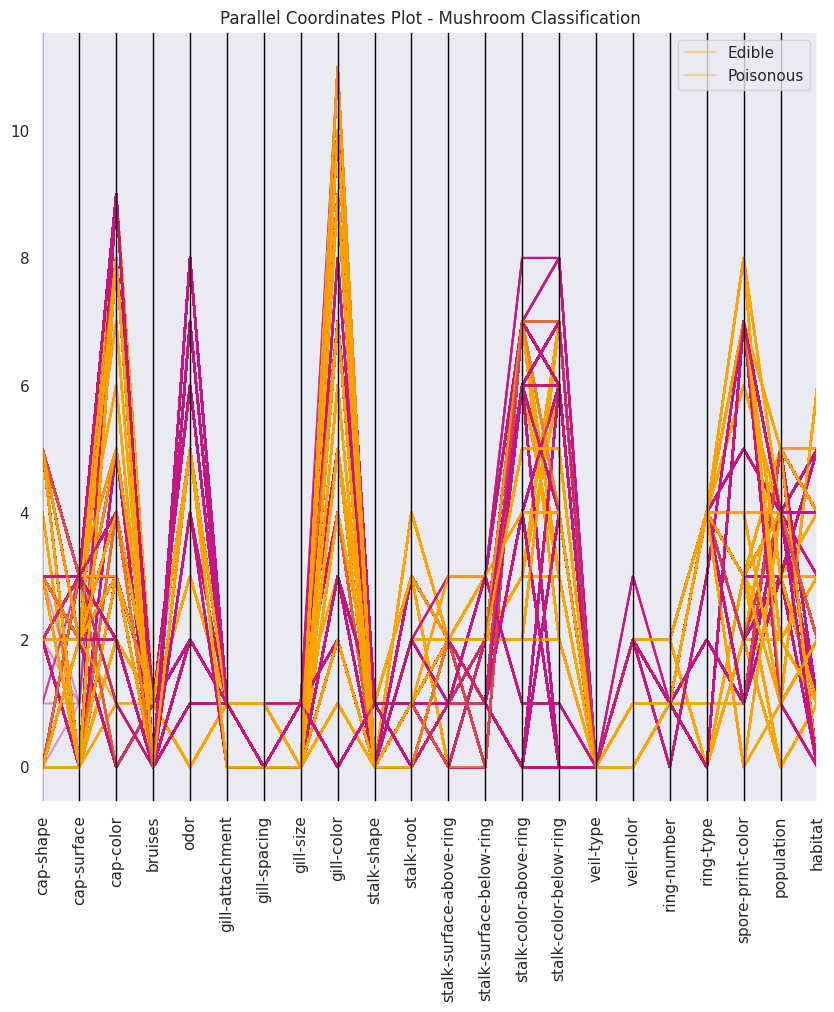

In [ ]:
from pandas.plotting import parallel_coordinates
subset_df=df[['poisonous','cap-shape','cap-surface','cap-color',
              'bruises','odor','gill-attachment','gill-spacing',
              'gill-size','gill-color','stalk-shape','stalk-root',
              'stalk-surface-above-ring','stalk-surface-below-ring',
              'stalk-color-above-ring','stalk-color-below-ring',
              'veil-color','ring-number','ring-type',
              'spore-print-color','population','habitat']]
plt.figure(figsize=(10,10))
parallel_coordinates(df, 'poisonous', color=['orange', 'mediumvioletred'], alpha=0.4)
plt.xticks(rotation='vertical')
# Add legend and title
plt.legend(['Edible', 'Poisonous'])
plt.title('Parallel Coordinates Plot - Mushroom Classification')

# Display the plot
plt.show()

In [ ]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (8123, 22)
Shape of y: (8123,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=100)
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (6092, 22)
Shape of testing feature: (2031, 22)
Shape of training label: (6092,)
Shape of training label: (2031,)


In [ ]:
def evaluate_model(model, x_test, y_test):
    #predicting
    y_pred = model.predict(x_test)
    #metrics
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred,average='micro')
    rec = metrics.recall_score(y_test, y_pred,average='micro')
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)
    #area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    # confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    # Printing results
    print('Accuracy: %.2f'%(acc*100))
    print('Precision: %.2f'%(prec*100))
    print('Recall: %.2f'%(rec*100))
    print('F1 Score %.2f'%(f1*100))
    print('Cohens Kappa Score: %.2f'%(kappa*100))
    print('Area Under Curve: %.2f'%(auc*100))
    print('Confusion Matrix:\n')
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in
              zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.heatmap(cm, annot=labels, fmt='')

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

Accuracy: 100.00
Precision: 100.00
Recall: 100.00
F1 Score 100.00
Cohens Kappa Score: 100.00
Area Under Curve: 100.00
Confusion Matrix:



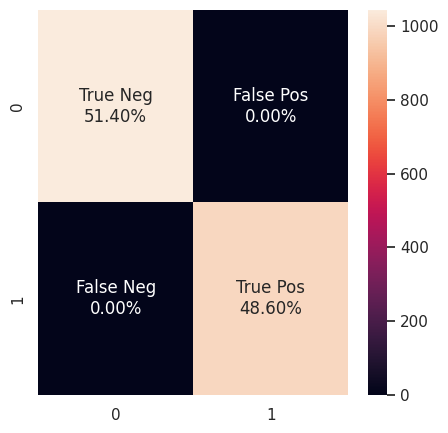

In [ ]:
# Building Decision Tree model
dtc = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=10, min_samples_leaf=2)
dtc.fit(X_train, y_train)

# Evaluate Model

dtc_eval = evaluate_model(dtc, X_test, y_test)


In [ ]:
categorical=['x','s','n','t','p','f','c','n','n','e','e','s','s','w','w','p','w','o','p','k','s','g']
numerical=[5,2,4,1,6,1,0,1,5,1,0,2,2,7,7,0,2,1,4,2,3,1]
test_data={"attribute":columns[1:],"values":categorical,"encoded":numerical}
test_df=pd.DataFrame.from_dict(test_data)
test_df

,attribute,values,encoded
0,cap-shape,x,5
1,cap-surface,s,2
2,cap-color,n,4
3,bruises,t,1
4,odor,p,6
5,gill-attachment,f,1
6,gill-spacing,c,0
7,gill-size,n,1
8,gill-color,n,5
9,stalk-shape,e,1


In [ ]:
# Building Decision Tree model
dtc = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=10, min_samples_leaf=2)
dtc.fit(X_train, y_train)

#Prediction
test=[[5,2,4,1,6,1,0,1,5,1,0,2,2,7,7,0,2,1,4,2,3,1]]
actual='p'
y_pred=dr=dtc.predict(test)
if(y_pred==1):
  y_pred='p'
else:
  y_pred='e'
print("Actual Value: ",actual," Predicted Value: ",y_pred)

Actual Value:  p  Predicted Value:  p


Accuracy: 99.95
Precision: 99.95
Recall: 99.95
F1 Score 99.95
Cohens Kappa Score: 99.90
Area Under Curve: 100.00
Confusion Matrix:



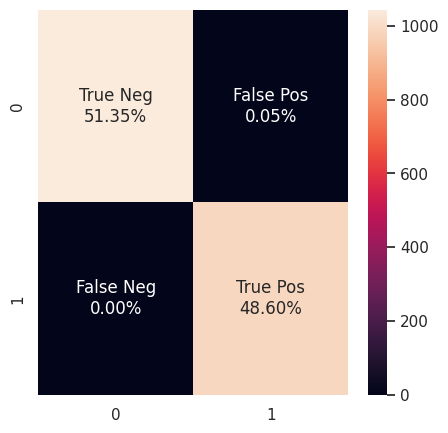

In [ ]:
# Building K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

In [ ]:
categorical=['f','y','e','f','y','f','c','n','b','t','r','k','s','w','w','p','w','o','e','w','v','d']
numerical=[2,3,2,0,8,1,0,1,0,1,0,1,2,7,7,0,2,1,0,7,4,0]
test_data={"attribute":columns[1:],"values":categorical,"encoded":numerical}
test_df=pd.DataFrame.from_dict(test_data)
test_df

,attribute,values,encoded
0,cap-shape,f,2
1,cap-surface,y,3
2,cap-color,e,2
3,bruises,f,0
4,odor,y,8
5,gill-attachment,f,1
6,gill-spacing,c,0
7,gill-size,n,1
8,gill-color,b,0
9,stalk-shape,t,1


In [ ]:
# Building K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

test=[[2,3,2,0,8,1,0,1,0,1,0,1,2,7,7,0,2,1,0,7,4,0]]
actual='p'
y_pred=knn.predict(test)
if(y_pred==1):
  y_pred='p'
else:
  y_pred='e'
print("Actual Value: ",actual," Predicted Value: ",y_pred)

Actual Value:  p  Predicted Value:  p


Accuracy: 94.93
Precision: 94.93
Recall: 94.93
F1 Score 94.77
Cohens Kappa Score: 89.85
Area Under Curve: 98.40
Confusion Matrix:



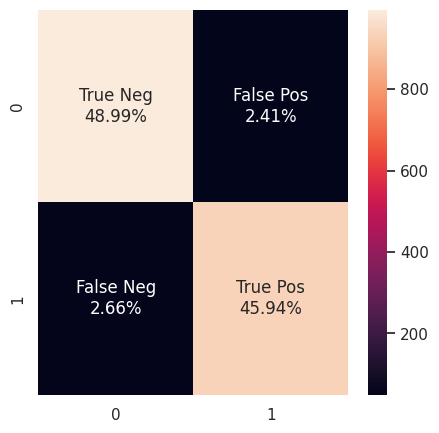

In [ ]:
# Building Logistic Regression model
lrc = LogisticRegression(solver='lbfgs', max_iter=500)
lrc.fit(X_train, y_train)

# Evaluate Model
lrc_eval = evaluate_model(lrc, X_test, y_test)


In [ ]:
categorical=['x','s','n','t','p','f','c','n','n','e','e','s','s','w','w','p','w','o','p','k','s','g']
numerical=[5,2,4,1,6,1,0,1,5,1,0,2,2,7,7,0,2,1,4,2,3,1]
test_data={"attribute":columns[1:],"values":categorical,"encoded":numerical}
test_df=pd.DataFrame.from_dict(test_data)
test_df

,attribute,values,encoded
0,cap-shape,x,5
1,cap-surface,s,2
2,cap-color,n,4
3,bruises,t,1
4,odor,p,6
5,gill-attachment,f,1
6,gill-spacing,c,0
7,gill-size,n,1
8,gill-color,n,5
9,stalk-shape,e,1


In [ ]:
# Building Logistic Regression model
lrc = LogisticRegression(solver='lbfgs', max_iter=500)
lrc.fit(X_train, y_train)


#Prediction
test=[[5,2,4,1,6,1,0,1,5,1,0,2,2,7,7,0,2,1,4,2,3,1]]
actual='p'
y_pred=dr=dtc.predict(test)
if(y_pred==1):
  y_pred='p'
else:
  y_pred='e'
print("Actual Value: ",actual," Predicted Value: ",y_pred)

Actual Value:  p  Predicted Value:  p


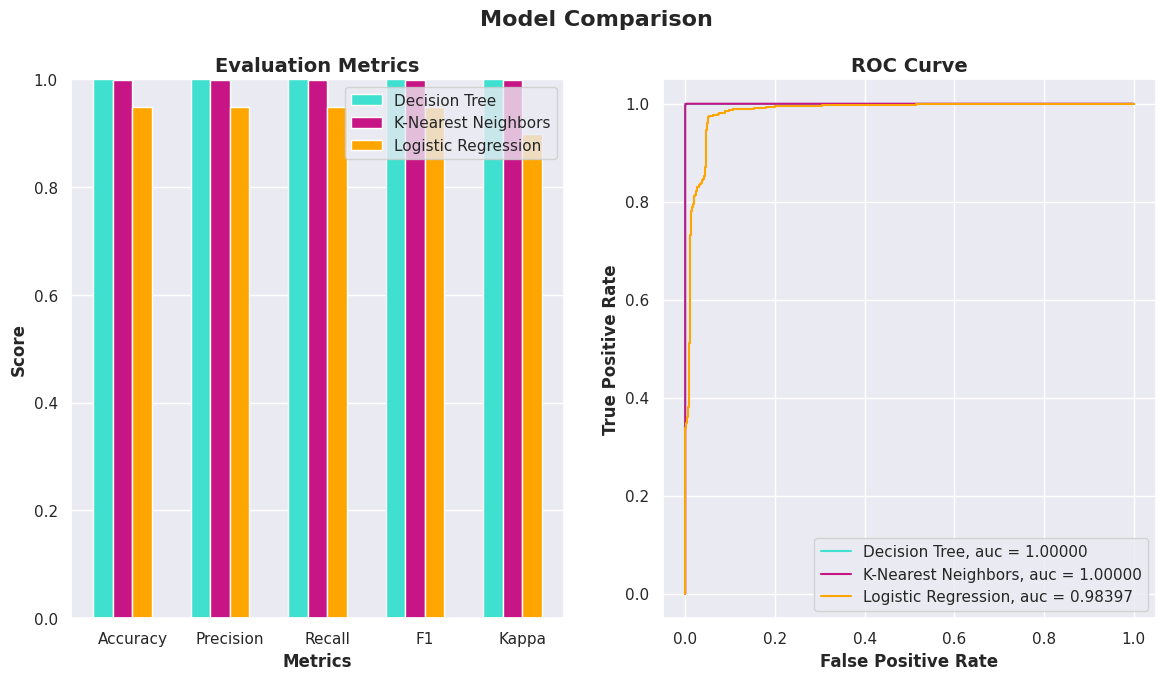

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
lrc_score = [lrc_eval['acc'], lrc_eval['prec'], lrc_eval['rec'], lrc_eval['f1'], lrc_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree',color='turquoise')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors',color='mediumvioletred')
ax1.bar(r3, lrc_score, width=barWidth, edgecolor='white', label='Logistic Regression',color='orange')
## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']),color='turquoise')
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Neighbors, auc = {:0.5f}'.format(knn_eval['auc']),color='mediumvioletred')
ax2.plot(lrc_eval['fpr'], lrc_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lrc_eval['auc']),color='orange')

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)
